In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
import wandb

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

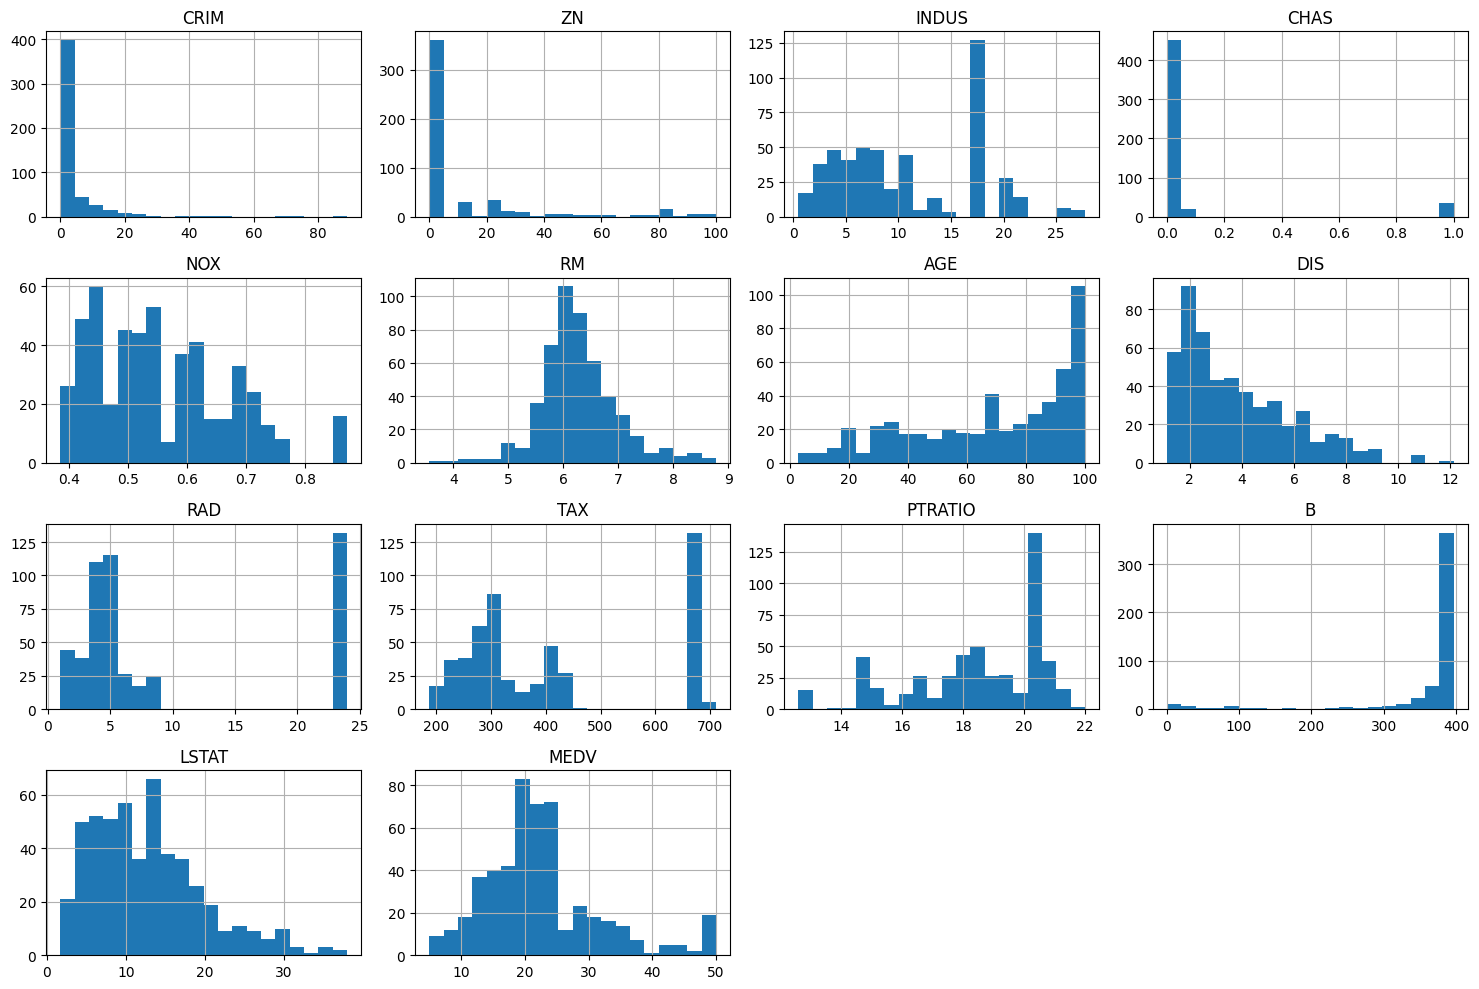

               mean  standard_deviation       max        min
CRIM       3.611874            8.537322   88.9762    0.00632
ZN        11.211934           22.898391  100.0000    0.00000
INDUS     11.083992            6.692542   27.7400    0.46000
CHAS       0.069959            0.249986    1.0000    0.00000
NOX        0.554695            0.115763    0.8710    0.38500
RM         6.284634            0.701923    8.7800    3.56100
AGE       68.518519           27.412339  100.0000    2.90000
DIS        3.795043            2.103628   12.1265    1.12960
RAD        9.549407            8.698651   24.0000    1.00000
TAX      408.237154          168.370495  711.0000  187.00000
PTRATIO   18.455534            2.162805   22.0000   12.60000
B        356.674032           91.204607  396.9000    0.32000
LSTAT     12.715432            7.005806   37.9700    1.73000
MEDV      22.532806            9.188012   50.0000    5.00000


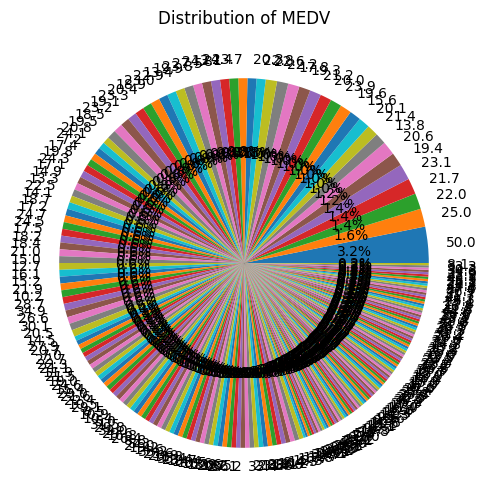

In [2]:
data = pd.read_csv('HousingData.csv')
print(data)
print(data.shape)
# Describe the dataset
description = data.describe()
data = data.fillna(data.mean())
# Draw a histogram for each attribute
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()
# fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
tuples = []
for column in data.columns:
    column_data = data[column]
    mean = np.mean(column_data)
    min = np.min(column_data)
    max = np.max(column_data)
    standard_deviation = np.std(column_data)
    tuples.append((mean,standard_deviation,max,min))

# df_metrics = pd.DataFrame(tuples,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id'])
df_metrics = pd.DataFrame(tuples, columns=['mean', 'standard_deviation', 'max', 'min'], index=data.columns)
print(df_metrics)
# Draw a pie chart for the 'quality' attribute
quality_counts = data['MEDV'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%')
plt.title('Distribution of MEDV')
plt.show()

# Multi Layer Perceptron Regression in Python from Scratch

In [3]:
# Multiperceptron MultiLabel Classification
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

class MultiLayerPerceptronRegression:
    def __init__(self, input_layer_size, num_hidden_layers, hidden_layer_size, output_layer_size, learning_rate=0.001, activation_type='sigmoid', optimizer_type='batch',max_iterations=10000):
        self.learning_rate = learning_rate
        self.input_layer_size = input_layer_size
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        self.activation_type = activation_type
        self.optimizer_type = optimizer_type
        self.weights = self.initialize_weights()
        self.yHat = None
        self.activation_function = self.sigmoid
        self.activation_prime_function = self.sigmoid_prime
        self.max_iterations = max_iterations
        self.train_function = self.train_sgd
        self.wandlog = False

    def initialize_weights(self):
        self.weights = []
        self.num_layers = self.num_hidden_layers+1
        self.weights.append(np.random.randn(self.input_layer_size, self.hidden_layer_size))
        for i in range(1,self.num_layers-1):
            self.weights.append(np.random.randn(self.hidden_layer_size, self.hidden_layer_size))
        self.weights.append(np.random.randn(self.hidden_layer_size, self.output_layer_size))
        return self.weights

    def sigmoid(self, z):
        return expit(z)

    def sigmoid_prime(self, z):
        out = self.sigmoid(z)
        return out * (1 - out)
    
    def tanh(self, z):
        return np.tanh(z)

    def tanh_prime(self, z):
        return 1 - np.square(np.tanh(z))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_prime(self, z):
        return (z > 0).astype(int)
 
    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_activation_type(self, activation_type):
        self.activation_type = activation_type
        self.set_activation_function()

    def set_optimizer_type(self, optimizer_type):
        self.optimizer_type = optimizer_type
        self.set_train_function()

    def set_activation_function(self):
        if self.activation_type == 'sigmoid':
            self.activation_function = self.sigmoid
            self.activation_prime_function = self.sigmoid_prime
        elif self.activation_type == 'relu':
            self.activation_function = self.relu
            self.activation_prime_function = self.relu_prime
        elif self.activation_type == 'tanh':
            self.activation_function = self.tanh
            self.activation_prime_function = self.tanh_prime

    def set_train_function(self):
        if self.optimizer_type == 'SGD':
            self.train_function = self.train_sgd
        elif self.optimizer_type == 'mini':
            self.train_function = self.train_mini_batch
        elif self.optimizer_type == 'batch':
            self.train_function = self.train_batch

    def set_hidden_layers(self,num_hidden_layers,hidden_layer_size):
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.weights = self.initialize_weights()

    def set_epochs(self,epochs):
        self.max_iterations = epochs

    def set_wandb(self,state):
        self.wandlog = state

    def forward_propagation(self, X):
        Z = [np.dot(X, self.weights[0])]
        A = []
        len_weights = len(self.weights)-1
        for i in range(0, len_weights):
            A.append(self.activation_function(Z[i]))
            Z.append(np.dot(A[i], self.weights[i + 1]))
        yHat = Z[-1]  # Linear activation for regression
        self.activations = A
        self.weighted_sums = Z
        return yHat

    def backward_propogation(self, X, y):
        self.yHat = self.forward_propagation(X)
        errors , gradients = [None] * self.num_layers , [None] * self.num_layers
        errors[-1] = self.yHat - y
        for i in range(self.num_layers - 2, -1, -1):
            gradients[i+1] = np.dot(self.activations[i].T, errors[i + 1])
            errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])
        gradients[0] = np.dot(X.T, errors[0])
        return gradients

    def update(self, X, y,learning_rate):
        gradients = self.backward_propogation(X, y)
        for i in range(self.num_layers):
            self.weights[i] -= gradients[i]*learning_rate
    
    def costFunction(self, X, y):
        yHat = self.forward_propagation(X)
        J = 0.5 * np.sum((y - yHat)**2)/len(X)
        return J

    def train_batch(self, X, y, learning_rate=0.01, max_iterations=10000,show=False):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        maxiter = max_iterations
        lr = learning_rate
        k = 0
        while (k < maxiter):
            self.update(X, y,learning_rate)
            k+=1
            if k % 250 == 0:
                loss = self.costFunction(X, y)
                self.J.append(loss)
                if show == True:
                    wandb.log({"Epoch":k,"Loss":loss})
                    print("Epoch %d: loss = %f" % (k, loss))
        loss = self.costFunction(X, y)   
        self.J.append(loss)    
        print("Operation SGD terminated successfully.")
        print("         Iterations: %d" % k)
        print("         Final loss function: %f" % loss)
        if show == True:
            wandb.log({"Epoch":k,"Loss":loss})
            self.plot_loss()
        return loss
    
    def train_sgd(self, X, y,learning_rate=0.01,max_iterations=10000,show=False):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        k = 0
        for epoch in range(max_iterations):
            index = np.random.randint(len(X))
            self.update(X[index:index+1], y[index:index+1],learning_rate)
            k+=1
            if (epoch % 250 == 0):
                loss = self.costFunction(X, y)
                self.J.append(loss)
                if show == True:
                    print("Epoch %d: loss = %f" % (epoch, loss))
                    wandb.log({"Epoch":epoch,"Loss":loss})
        loss = self.costFunction(X, y)
        self.J.append(loss)
        print("Operation SGD terminated successfully.")
        print("         Iterations: %d" % k)
        print("         Final loss function: %f" % loss)
        if show == True:
            wandb.log({"Epoch":k,"Loss":loss})
            self.plot_loss()
        return loss
    
    def train_mini_batch(self, X, y, learning_rate=0.01, max_iterations=10000, batch_size=32,show=False):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (k < maxiter):
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            k+=1
            for j in range(0, len(X), batch_size):
                batch_indices = indices[j:j+batch_size]
                self.update(X[batch_indices], y[batch_indices],learning_rate)
            if k % 250 == 0:
                loss = self.costFunction(X, y)
                self.J.append(loss)
                if show == True:
                    print("Iteration %d: loss = %f" % (k, loss))
                    wandb.log({"Epoch":k,"Loss":loss})
        loss = self.costFunction(X, y)
        self.J.append(loss)
        print("Operation SGD terminated successfully.")
        print("         Iterations: %d" % k)
        print("         Final loss function: %f" % loss)
        if show == True:
            wandb.log({"Epoch":k,"Loss":loss})
            self.plot_loss()
        return loss

    def plot_loss(self):
        if not self.J:
            print("Loss array is empty")
        else:
            plt.plot(self.J)
            plt.title('Loss Over Iterations')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()

    def predict(self, X):
        yHat = self.forward_propagation(X)
        return yHat

In [4]:
np.random.seed(27)
LR = 0.001
Max_Iter = 10000
NN = MultiLayerPerceptronRegression(input_layer_size=13, num_hidden_layers=9, hidden_layer_size=13,
                                          output_layer_size=1, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
X = data.drop(columns=['MEDV'])  # Remove 'MEDV' columns from features
scaler = StandardScaler()
X = np.array(scaler.fit_transform(X))
min_max_scaler = MinMaxScaler()
X = np.array(min_max_scaler.fit_transform(X))
y = np.array(data['MEDV'])  # Target variable
# y = np.array([[x] for x in y])
# y = np.array((y-5)/50)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
y_train_array = np.array([[x] for x in y_train])
wandb.init(project="MLP-Regression-Train")
NN.train_function(X=X_train, y=y_train_array, learning_rate=LR, max_iterations=Max_Iter,show=True)
wandb.finish()

In [5]:
def mean_squared_error(y_true, y_pred):
    mse = ((y_true - y_pred) ** 2).mean()
    return mse

def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def r_square(y_true,y_pred):
    y_mean = np.mean(y_true)
    ssr = np.sum((y_pred - y_mean) ** 2)
    sst = np.sum((y_true - y_mean) ** 2)
    r2 = ssr / sst
    return r2

y_pred = NN.predict(X_val)
print('------------------------------------')
# for i in range(len(y_val)):
#     print(y_val[i], y_pred[i][0])
y_pred_new = np.array(y_pred).flatten()
mse = mean_squared_error(y_val,y_pred_new)
rmse = root_mean_squared_error(y_val,y_pred_new)
rsquare = r_square(y_val,y_pred_new)
print("Mean Squared Error",mse)
print("Root Mean Square Error",rmse)
print("R-Square Error",rsquare)
print('------------------------------------')

In [7]:
import wandb
wandb.init(project="MLP-Regression-Activation")
results = []
LR = 0.0001
Max_iterations = 5000
model = MultiLayerPerceptronRegression(input_layer_size=13, num_hidden_layers=9, hidden_layer_size=13, output_layer_size=1, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
sweep_config = {
    "method": "grid",
    "name": "MLP-Regression-Activation",
    "metric": {"goal": "minimize", "name": "MSE"},
    "parameters": {
        "activation": {"values": ['sigmoid', 'tanh', 'relu']},
        "optimizer": {"values": ['SGD', 'batch', 'mini']},
    },
}
sweep_id = wandb.sweep(sweep_config, project="MLP-Regression-Activation")
def train():
    wandb.init(project="MLP-Regression-Activation")
    config = wandb.config
    activation = config.activation
    optimizer = config.optimizer
    np.random.seed(27)  # Set a random seed for reproducibility
    model.set_activation_type(activation)
    model.set_optimizer_type(optimizer)
    loss = model.train_function(X=X_train, y=y_train_array, learning_rate=LR, max_iterations=Max_iterations)
    y_pred = model.predict(X_val)
    y_pred_new = np.array(y_pred).flatten()
    mse = mean_squared_error(y_val,y_pred_new)
    rmse = root_mean_squared_error(y_val,y_pred_new)
    rsquare = r_square(y_val,y_pred_new)
    result = {
        'Activation': activation,
        'Optimizer': optimizer,
        'MSE': mse,
        'RMSE': rmse,
        'R-square': rsquare,
    }
    results.append(result)
    wandb.log({"Activation": activation, "Optimizer": optimizer, "MSE": mse, "RMSE": rmse, "R-square": rsquare})

# Run the sweep
wandb.agent(sweep_id, function=train)
df = pd.DataFrame(results)
df = df.dropna()
df = df.sort_values(by='MSE')
df = df.reset_index(drop=True)
# Print the DataFrame
print(df.to_string(index=False))
wandb.finish()

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: pz3ajxt4
Sweep URL: https://wandb.ai/rohitgowlapalli01/MLP-Regression/sweeps/pz3ajxt4
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: 8cc9gfdi with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 44.628915


Exception in thread ChkStopThrException in thread :
Exception in thread NetStatThrTraceback (most recent call last):
IntMsgThr:
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
        self.run()    self.run()
self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run

  File "/usr/lib/python3.8/threading.py", line 870, in run
  File "/usr/lib/python3.8/threading.py", line 870, in run
        self._target(*self._args, **self._kwargs)    self._target(*self._args, **self._kwargs)
self._target(*self._args, **self._kwargs)
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 299, in check_internal_messages

  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 285, in check_st

MSE,▁
R-square,▁
RMSE,▁
Activation,sigmoid
MSE,66.94839
Optimizer,SGD
R-square,0.01773
RMSE,8.1822


wandb: Agent Starting Run: tpe8k9wg with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 3.604379


MSE,▁
R-square,▁
RMSE,▁
Activation,sigmoid
MSE,9.57818
Optimizer,batch
R-square,0.93102
RMSE,3.09486


wandb: Agent Starting Run: p5xcqsyp with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 2.237016


MSE,▁
R-square,▁
RMSE,▁
Activation,sigmoid
MSE,13.43744
Optimizer,mini
R-square,0.96875
RMSE,3.66571


wandb: Agent Starting Run: jds9q6kj with config:
wandb: 	activation: tanh
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 44.644983


MSE,▁
R-square,▁
RMSE,▁
Activation,tanh
MSE,67.86905
Optimizer,SGD
R-square,0.03199
RMSE,8.23827


wandb: Agent Starting Run: bb48gxli with config:
wandb: 	activation: tanh
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 44.613357


MSE,▁
R-square,▁
RMSE,▁
Activation,tanh
MSE,67.19726
Optimizer,batch
R-square,0.02176
RMSE,8.19739


wandb: Agent Starting Run: qcsh5gni with config:
wandb: 	activation: tanh
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 44.613632


MSE,▁
R-square,▁
RMSE,▁
Activation,tanh
MSE,67.25401
Optimizer,mini
R-square,0.02263
RMSE,8.20085


wandb: Agent Starting Run: 8e071vb5 with config:
wandb: 	activation: relu
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_21368/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Activation,relu
MSE,nan
Optimizer,SGD
R-square,nan
RMSE,nan


wandb: Agent Starting Run: mlovg1fx with config:
wandb: 	activation: relu
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Activation,relu
MSE,nan
Optimizer,batch
R-square,nan
RMSE,nan


wandb: Agent Starting Run: na4vrozc with config:
wandb: 	activation: relu
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Activation,relu
MSE,nan
Optimizer,mini
R-square,nan
RMSE,nan


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [6]:
import wandb
wandb.init(project="MLP-Regression-Epoch")
np.random.seed(42)
LR = 0.0001
Max_iterations = 5000
results = []
model = MultiLayerPerceptronRegression(input_layer_size=13, num_hidden_layers=9, hidden_layer_size=13, output_layer_size=1, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
model.set_activation_type('sigmoid')
model.set_optimizer_type('batch')
sweep_config = {
    "method": "grid",
    "name": "MLP-Regression-Epoch",
    "metric": {"goal": "minimize", "name": "MSE"},
    "parameters": {
        "rate": {"values": [0.001, 0.01, 0.1]},
        "epoch": {"values": [1000, 5000, 10000]},
        "hln":{"values":[13,26,39]}
    },
}
sweep_id = wandb.sweep(sweep_config, project="MLP-Regression-Epoch")
def train():
    wandb.init(project="MLP-Regression-Epoch")
    config = wandb.config
    rate = config.rate
    hln = int(config.hln)
    epoch = int(config.epoch)
    np.random.seed(27)
    model.set_learning_rate(rate)
    model.set_epochs(epoch)
    model.set_hidden_layers(num_hidden_layers=int(hln/13),hidden_layer_size=hln)
    loss = model.train_function(X_train, y_train_array, learning_rate=rate, max_iterations=epoch)
    y_pred = model.predict(X_val)
    y_pred_new = np.array(y_pred).flatten()
    mse = mean_squared_error(y_val,y_pred_new)
    rmse = root_mean_squared_error(y_val,y_pred_new)
    rsquare = r_square(y_val,y_pred_new)
    results.append({
        'Learning Rate': rate,
        'Epochs': epoch,
        'Hidden Layer Neurons': hln,
        'Loss':loss,
        'MSE': mse,
        'RMSE': rmse,
        'R-square': rsquare,
    })
    wandb.log({"Learning Rate": rate, "Epochs": epoch, "RMSE": rmse, "R-square": rsquare,"Hidden Layer Neurons":hln,"MSE": mse})

# Run the sweep
wandb.agent(sweep_id, function=train)
df = pd.DataFrame(results)
df = df.dropna()
df = df.sort_values(by='MSE')
df = df.reset_index(drop=True)
print("Hyperparameter Tuning Results:")
print(df.to_string(index=False))
best_params = df.iloc[0].to_dict()
print("\nBest Model Parameters:")
print(best_params)
wandb.finish()

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: rohitgowlapalli01. Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: qzi9xl5z
Sweep URL: https://wandb.ai/rohitgowlapalli01/MLP-Regression-Epoch/sweeps/qzi9xl5z
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: oeekfhkh with config:
wandb: 	epoch: 1000
wandb: 	hln: 13
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: 5.040772


Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread IntMsgThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 285, in check_stop_status
        self.run()self._target(*self._args, **self._kwargs)

      File "/usr/lib/python3.8/threading.py", line 870, in run
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 267, in check_network_status
self._loop_check_status(
  File "/h

Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,1000
Hidden Layer Neurons,13
Learning Rate,0.001
MSE,13.0301
R-square,0.92135


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 648uaw38 with config:
wandb: 	epoch: 1000
wandb: 	hln: 13
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: 311.975182


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,1000
Hidden Layer Neurons,13
Learning Rate,0.01
MSE,546.59099
R-square,7.31115


wandb: Agent Starting Run: 1ouallhu with config:
wandb: 	epoch: 1000
wandb: 	hln: 13
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: nan


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,1000
Hidden Layer Neurons,13
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: pjo7aej9 with config:
wandb: 	epoch: 1000
wandb: 	hln: 26
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: 12.566536


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,1000
Hidden Layer Neurons,26
Learning Rate,0.001
MSE,27.04742
R-square,0.70554


wandb: Agent Starting Run: ks0n0g0t with config:
wandb: 	epoch: 1000
wandb: 	hln: 26
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,1000
Hidden Layer Neurons,26
Learning Rate,0.01
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: javnlkgf with config:
wandb: 	epoch: 1000
wandb: 	hln: 26
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,1000
Hidden Layer Neurons,26
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: n2p3wu61 with config:
wandb: 	epoch: 1000
wandb: 	hln: 39
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: 44.613351


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,1000
Hidden Layer Neurons,39
Learning Rate,0.001
MSE,67.19728
R-square,0.02176


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qlx8ayq8 with config:
wandb: 	epoch: 1000
wandb: 	hln: 39
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,1000
Hidden Layer Neurons,39
Learning Rate,0.01
MSE,nan
R-square,nan
RMSE,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ns7g6z5d with config:
wandb: 	epoch: 1000
wandb: 	hln: 39
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 1000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,1000
Hidden Layer Neurons,39
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: fs4oe6dj with config:
wandb: 	epoch: 5000
wandb: 	hln: 13
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 2.656784


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,5000
Hidden Layer Neurons,13
Learning Rate,0.001
MSE,15.67007
R-square,1.07215


wandb: Agent Starting Run: iceddppz with config:
wandb: 	epoch: 5000
wandb: 	hln: 13
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 311.975182


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,5000
Hidden Layer Neurons,13
Learning Rate,0.01
MSE,546.59099
R-square,7.31115


wandb: Agent Starting Run: 8cei47di with config:
wandb: 	epoch: 5000
wandb: 	hln: 13
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,5000
Hidden Layer Neurons,13
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: bn197zd2 with config:
wandb: 	epoch: 5000
wandb: 	hln: 26
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 2.571051


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,5000
Hidden Layer Neurons,26
Learning Rate,0.001
MSE,12.49825
R-square,1.00313


wandb: Agent Starting Run: ywcie6ys with config:
wandb: 	epoch: 5000
wandb: 	hln: 26
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,5000
Hidden Layer Neurons,26
Learning Rate,0.01
MSE,nan
R-square,nan
RMSE,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ssa2cym8 with config:
wandb: 	epoch: 5000
wandb: 	hln: 26
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,5000
Hidden Layer Neurons,26
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: kfssip2y with config:
wandb: 	epoch: 5000
wandb: 	hln: 39
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: 44.613321


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,5000
Hidden Layer Neurons,39
Learning Rate,0.001
MSE,67.19725
R-square,0.02176


wandb: Agent Starting Run: ftwz7kx5 with config:
wandb: 	epoch: 5000
wandb: 	hln: 39
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,5000
Hidden Layer Neurons,39
Learning Rate,0.01
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: b759nyoa with config:
wandb: 	epoch: 5000
wandb: 	hln: 39
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 5000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,5000
Hidden Layer Neurons,39
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: 8ryawnl9 with config:
wandb: 	epoch: 10000
wandb: 	hln: 13
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: 1.902404


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,10000
Hidden Layer Neurons,13
Learning Rate,0.001
MSE,16.17414
R-square,1.13709


wandb: Agent Starting Run: 8d4l788q with config:
wandb: 	epoch: 10000
wandb: 	hln: 13
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: 311.975182


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,10000
Hidden Layer Neurons,13
Learning Rate,0.01
MSE,546.59099
R-square,7.31115


wandb: Agent Starting Run: muv6ks9i with config:
wandb: 	epoch: 10000
wandb: 	hln: 13
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,10000
Hidden Layer Neurons,13
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: u407tv12 with config:
wandb: 	epoch: 10000
wandb: 	hln: 26
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: 1.466302


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,10000
Hidden Layer Neurons,26
Learning Rate,0.001
MSE,15.3179
R-square,1.09024


wandb: Agent Starting Run: 43l8ci88 with config:
wandb: 	epoch: 10000
wandb: 	hln: 26
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,10000
Hidden Layer Neurons,26
Learning Rate,0.01
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: hpltx4xh with config:
wandb: 	epoch: 10000
wandb: 	hln: 26
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,10000
Hidden Layer Neurons,26
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: dvebmiqq with config:
wandb: 	epoch: 10000
wandb: 	hln: 39
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: 44.489263


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
MSE,▁
R-square,▁
RMSE,▁
Epochs,10000
Hidden Layer Neurons,39
Learning Rate,0.001
MSE,67.00683
R-square,0.02177


wandb: Agent Starting Run: 54sbg8iv with config:
wandb: 	epoch: 10000
wandb: 	hln: 39
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,10000
Hidden Layer Neurons,39
Learning Rate,0.01
MSE,nan
R-square,nan
RMSE,nan


wandb: Agent Starting Run: kev3508q with config:
wandb: 	epoch: 10000
wandb: 	hln: 39
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/tmp/ipykernel_24380/2808681432.py:110: RuntimeWarning: invalid value encountered in multiply
  errors[i] = np.dot(errors[i + 1], self.weights[i + 1].T) * self.activation_prime_function(self.weighted_sums[i])


Operation SGD terminated successfully.
         Iterations: 10000
         Final loss function: nan


Epochs,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Epochs,10000
Hidden Layer Neurons,39
Learning Rate,0.1
MSE,nan
R-square,nan
RMSE,nan


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Error in callback <function _WandbInit._pause_backend at 0x7fd5503bb820> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [30]:
y_pred = NN.predict(X_test)
print('------------------------------------')
# for i in range(len(y_val)):
#     print(y_val[i], y_pred[i][0])
y_pred_new = np.array(y_pred).flatten()
mse = mean_squared_error(y_test,y_pred_new)
rmse = root_mean_squared_error(y_test,y_pred_new)
rsquare = r_square(y_test,y_pred_new)
print("Mean Squared Error",mse)
print("Root Mean Square Error",rmse)
print("R-Square Error",rsquare)
print('------------------------------------')

------------------------------------
Mean Squared Error 34.95515877018472
Root Mean Square Error 5.912288792860572
R-Square Error 0.35249717266192054
------------------------------------
